#### Importing the libraries

In [297]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment=None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

#### Setting up the basic code snippets for sentiment models

In [367]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

# Vader sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for polarity score
analyser = SentimentIntensityAnalyzer()

"""
   following functions returns positive, negative, neutral emotion score of the text respectively. 
    """;
def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']
    
def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

#### Tweets processing & analysis

In [310]:
import csv
df=pd.read_csv(r'C:\Users\Vartika Chaudhary\Documents\\IndianElection19TwitterData.csv',index_col=0)
df        


,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


#### Tweets related to Narendra Modi

In [313]:
"""
Filtering out tweets with some keywords and hashtags in it 
referring to Narendra Modi that are commonly used on Twitter
"""

# Keywords to filter tweets
modi = ["Modi", "PM", "modi", "#PMModi", "modi ji", "narendra modi", "@narendramodi", "#Vote4Modi"]

# Create an empty DataFrame to store filtered tweets
modi_df = pd.DataFrame(columns=["Date", "User", "Tweet"])

# Function to check if a tweet refers to Modi
def ismodi(tweet):
    if not tweet:  # Handle empty or missing tweets
        return False
    t = tweet.split()
    return any(keyword in t for keyword in modi)

# Collect rows matching the criteria
filtered_rows = []

# Assuming `df` is the main DataFrame containing tweets
for row in df.values:
    if ismodi(str(row[2])):  # Check the 3rd column of each row
        filtered_rows.append({"Date": row[0], "User": row[1], "Tweet": row[2]})

# Create a new DataFrame with the filtered rows
if filtered_rows:
    modi_df = pd.DataFrame(filtered_rows)

# Output the filtered DataFrame
modi_df


,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...
...,...,...,...
25678,2019-04-09 12:06:31+00:00,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...
25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I am seriously worried about future of Indian ...
25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...
25681,2019-03-23 05:06:36+00:00,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ..."


In [315]:
modi_df['Tweet'].nunique()

25683

#### Tweets related to Rahul Gandhi

In [318]:
"""
Filtering out tweets with some keywords and hashtags in it 
referring to Rahul Gandhi that are commonly used on Twitter
"""

# Keywords to filter tweets
rahul = ["Rahul", "rahul", "#RahulGandhi", "rahul ji", "@RahulGandhi", "Rahul Gandhi"]

# Create an empty DataFrame to store filtered tweets
rahul_df = pd.DataFrame(columns=["Date", "User", "Tweet"])

# Function to check if a tweet refers to Rahul Gandhi
def israhul(tweet):
    if not tweet:  # Handle empty or missing tweets
        return False
    t = tweet.split()
    return any(keyword in t for keyword in rahul)

# Collect rows matching the criteria
filtered_rows = []

# Assuming `df` is the main DataFrame containing tweets
for row in df.values:
    if israhul(str(row[2])):  # Check the 3rd column of each row
        filtered_rows.append({"Date": row[0], "User": row[1], "Tweet": row[2]})

# Use pd.concat to create the final DataFrame
if filtered_rows:
    rahul_df = pd.concat([rahul_df, pd.DataFrame(filtered_rows)], ignore_index=True)

# Output the filtered DataFrame
rahul_df


,Date,User,Tweet
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...
...,...,...,...
26622,2019-03-23 04:53:54+00:00,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ..."
26623,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...
26624,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...
26625,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...


#### Data Cleaning : Removing Stopwords & Panctuations

In [321]:
from sklearn.feature_extraction import text
import string
stop = text.ENGLISH_STOP_WORDS

"""
 Removing stopwords (as in sklearn library) from tweets so as to get good polarity scores
    """;
modi_df['Tweet'] = modi_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rahul_df['Tweet'] = rahul_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

"""
 Removing panctuations from tweets
    """;
modi_df['Tweet'] = modi_df['Tweet'].apply(remove_punctuations)
rahul_df['Tweet'] = rahul_df['Tweet'].apply(remove_punctuations)

#### VadarSentiment Sentiment Analysis

In [324]:
"""
 Calculating the polarity scores with help of code snippets mentioned at the importing libraries section
    """;
modi_df['pos'] = modi_df['Tweet'].apply(lambda x :pos(x))
modi_df['neg'] = modi_df['Tweet'].apply(lambda x :neg(x))
modi_df['neu'] = modi_df['Tweet'].apply(lambda x :neu(x))

In [326]:
emotion=[]
for i in range(0,25683):
    emotion.append(max(modi_df['pos'][i],modi_df['neu'][i],modi_df['neg'][i]))

modi_df['FinalEmotion']=emotion

"""
 Traversing through the polarity scores for each tweet and
 assigning the Final Emotion as per the highest score among positive, negative, neutral
    """;
for i in range(0,25683):
    if modi_df['FinalEmotion'][i]==modi_df['pos'][i]:
        modi_df['FinalEmotion'][i]='positive'
    elif modi_df['FinalEmotion'][i]==modi_df['neg'][i]:
        modi_df['FinalEmotion'][i]='negative' 
    elif modi_df['FinalEmotion'][i]==modi_df['neu'][i]:
        modi_df['FinalEmotion'][i]='neutral'
modi_df

,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-18 23:50:47+00:00,advosushildixit,anjanaomkashyap I seeing future bjp spokespers...,0.307,0.000,0.693,neutral
1,2019-05-18 23:00:03+00:00,jiaeur,LokSabhaElections2019 23rd May 2019 reveal Ev...,0.228,0.000,0.772,neutral
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,LokSabhaElections2019 23rd May 2019 reveal Ev...,0.228,0.000,0.772,neutral
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates new record PM democratic count...,0.313,0.000,0.687,neutral
4,2019-05-18 21:22:29+00:00,ShakeChilli,abhijitmajumder Appointment Successor God forb...,0.215,0.110,0.675,neutral
...,...,...,...,...,...,...,...
25678,2019-04-09 12:06:31+00:00,shv_indian,1DDrive ModiSpeaksToNews18 LokSabhaElections20...,0.000,0.136,0.864,neutral
25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I seriously worried future Indian democracy na...,0.276,0.109,0.615,neutral
25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If narendramodi Bad Why does INCIndia needs Ma...,0.000,0.156,0.844,neutral
25681,2019-03-23 05:06:36+00:00,SONUPINKOO,On 23rd March Pakistan Day I Urge Indians Dere...,0.000,0.000,1.000,neutral


In [328]:
modi_df['FinalEmotion'].value_counts()

FinalEmotion
neutral     24994
positive      532
negative      157
Name: count, dtype: int64

C:\Users\Vartika Chaudhary\AppData\Local\Temp\ipykernel_24748\2643152737.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])


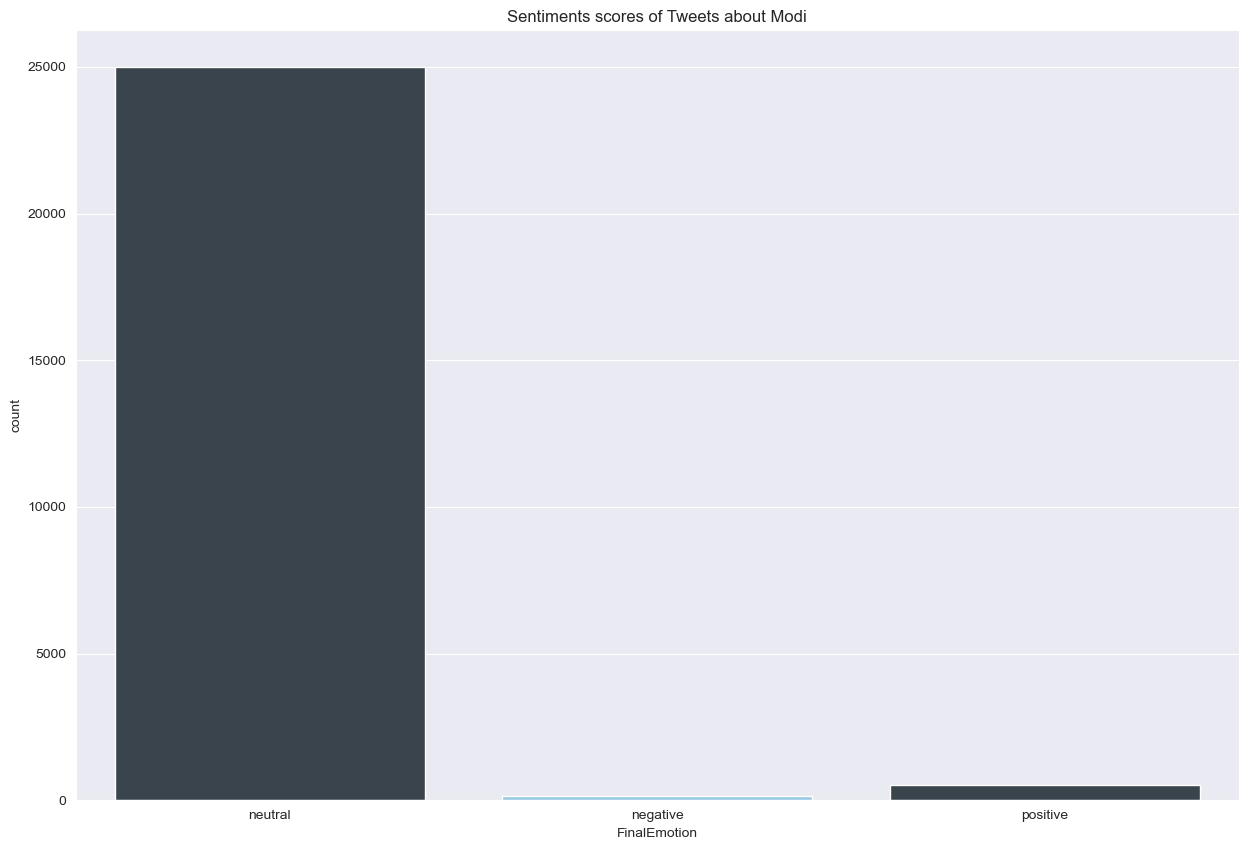

In [330]:
# Plot visualizing the counts of emotions of all the tweets
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')
plt.show()

In [332]:
"""
 Calculating the polarity scores with help of code snippets mentioned at the importing libraries section
    """;
rahul_df['pos'] = rahul_df['Tweet'].apply(lambda x :pos(x))
rahul_df['neg'] = rahul_df['Tweet'].apply(lambda x :neg(x))
rahul_df['neu'] = rahul_df['Tweet'].apply(lambda x :neu(x))

In [333]:
rahul_df

,Date,User,Tweet,pos,neg,neu
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828
...,...,...,...,...,...,...
26622,2019-03-23 04:53:54+00:00,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...,0.194,0.000,0.806
26623,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737
26624,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903
26625,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906


In [336]:
# Initialize the emotion list
emotion = []

# Check the length of rahul_df dynamically
for i in range(len(rahul_df)):
    # Extract the maximum score among 'pos', 'neu', 'neg' for each row
    emotion.append(max(rahul_df['pos'].iloc[i], rahul_df['neu'].iloc[i], rahul_df['neg'].iloc[i]))

# Assign the FinalEmotion column to the DataFrame
rahul_df['FinalEmotion'] = emotion

"""
Traversing through the polarity scores for each tweet and
assigning the Final Emotion as per the highest score among positive, negative, neutral.
"""
rahul_df

,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769,0.769
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848,0.848
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000,1.000
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682,0.682
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828,0.828
...,...,...,...,...,...,...,...
26622,2019-03-23 04:53:54+00:00,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...,0.194,0.000,0.806,0.806
26623,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737,0.737
26624,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903,0.903
26625,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906,0.906


In [338]:
rahul_df['FinalEmotion'].value_counts()

FinalEmotion
1.000    5016
0.769     204
0.833     161
0.714     153
0.625     149
         ... 
0.386       1
0.348       1
0.376       1
0.391       1
0.367       1
Name: count, Length: 605, dtype: int64

C:\Users\Vartika Chaudhary\AppData\Local\Temp\ipykernel_24748\3522725747.py:4: UserWarning: 
The palette list has fewer values (2) than needed (605) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#36454F','#89CFF0'])


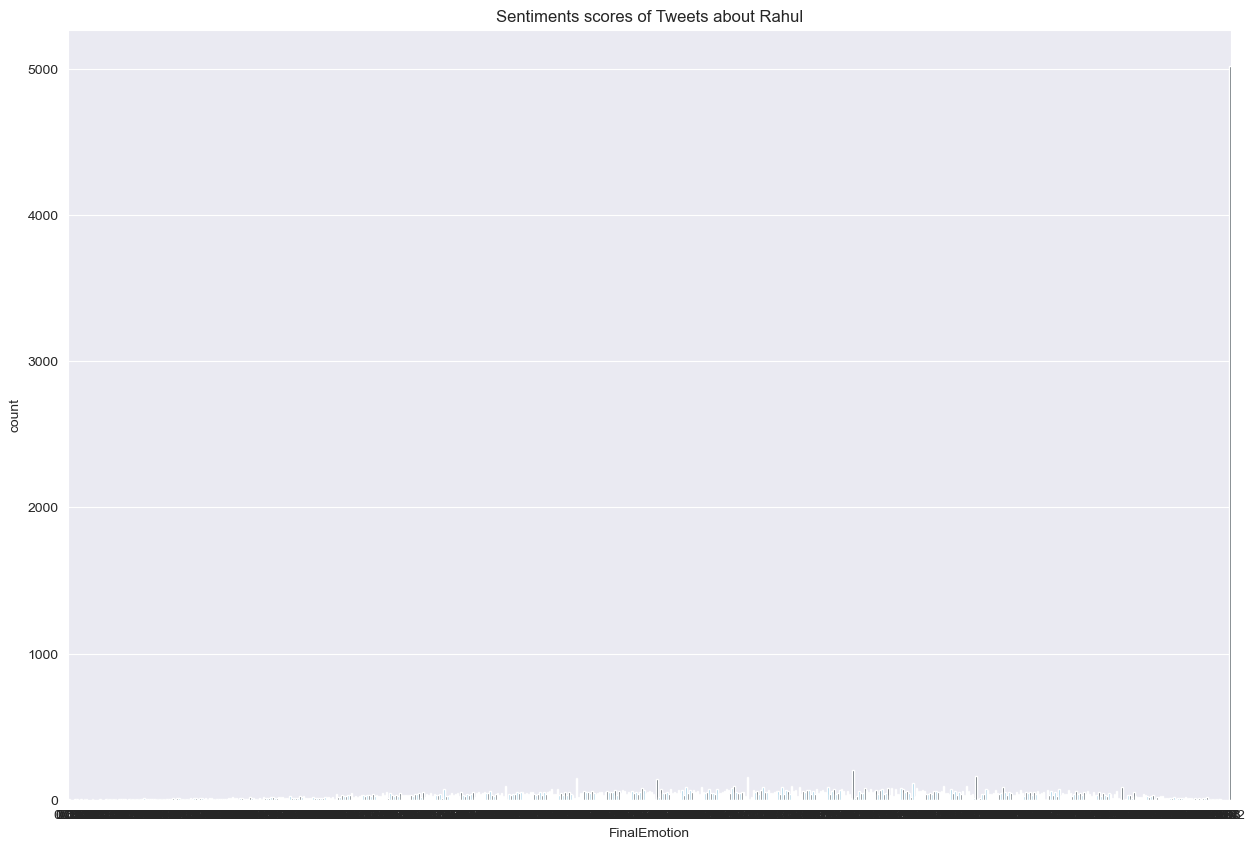

In [365]:
# Plot visualizing the counts of emotions of all the tweets
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Rahul')
plt.show()

#### Tweets Polarity visualization as timeseries

In [342]:
df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


In [241]:
# Keywords mentioning Modi and Rahul respectively
NaMo_ref = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]
RaGa_ref = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","Gandhi","#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi"]

In [345]:
# method to refer whether contains perticular words in tweets 
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

"""
 finding whether the tweet referred about Modi or Rahul
    """;
df['NaModi'] = df['Tweet'].apply(lambda x: identify_subject(x, NaMo_ref))
df['RaGandhi'] = df['Tweet'].apply(lambda x: identify_subject(x, RaGa_ref))
df.head(10)

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
5,2019-05-18 22:16:26+00:00,ankitgarg20,My somewhat biased exit poll for India electio...,1,0
6,2019-05-18 21:51:56+00:00,pkm1999,@rupasubramanya Even assuming statistical erro...,0,0
7,2019-05-18 21:43:15+00:00,rohanmodi,@abhijitmajumder Small correction. Nobody gets...,1,0
8,2019-05-18 21:36:20+00:00,Jmend124,We still fucking dancing 🕺🏼 ♏️ #INC,0,0
9,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,1,0


In [245]:
"""
 Filtering tweets mentioning either one of the pm candidate or both
 assigning 1 for NaModi and RaGandhi variables where there is a mention of them in the tweets 
 which was already decide by looking the keywords in tweets
    """;
df=df[(df['NaModi']==1) | (df['RaGandhi']==1)]

In [247]:
df

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...
142555,2019-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
142556,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
142560,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


#### Preprocessing

In [250]:
df=df.reset_index()
df.drop('index',axis=1,inplace=True)
df

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...
78054,2019-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
78055,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
78056,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
78057,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


In [252]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob
import nltk

# Downloading imp libraries and packages
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
!python -m textblob.download_corpora

[nltk_data] Downloading package omw-1.4 to C:\Users\Vartika
[nltk_data]     Chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vartika
[nltk_data]     Chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vartika
[nltk_data]     Chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Finished.


[nltk_data] Downloading package brown to C:\Users\Vartika
[nltk_data]     Chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Vartika
[nltk_data]     Chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vartika
[nltk_data]     Chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vartika
[nltk_data]     Chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Vartika
[nltk_data]     Chaudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Vartika
[nltk_data]     Chaudhary

In [275]:
"""
 Processing tweets by removing stopwords from nltk library
    """;
def preprocess_tweets(tweet):
    processed_tweet = tweet
    import re
    processed_tweet = re.sub(r'[^\w\s]', '', processed_tweet)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x))
df.head()

,Date,User,Tweet,NaModi,RaGandhi,Processed Tweet,polarity,subjectivity
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0,anjanaomkashyap I seeing future bjp spokespers...,0.350000,0.362500
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,Trinamool Congress Sitting MP Abhishek Banerje...,-0.050000,0.083333
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,LokSabhaElections2019 23rd May 2019 reveal Eve...,0.800000,0.400000
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,LokSabhaElections2019 23rd May 2019 reveal Eve...,0.800000,0.400000
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0,PM Modi creates new record PM democratic count...,0.468182,0.677273


In [255]:
print('Base Tweet\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned Tweet\n', df['Processed Tweet'][0])

Base Tweet
 @anjanaomkashyap I am seeing you as future #bjp spokesperson..
Good luck. Anjana Om Modi oops Kashyap.
Journalists like you changed the meaning of journalism. Janta maaf nai karege

------------------------------------

Cleaned Tweet
 @anjanaomkashyap I seeing future #bjp spokesperson.. Good luck. Anjana Om Modi oops Kashyap. Journalists like changed meaning journalism. Janta maaf nai karege


In [256]:
print(df.columns)

Index(['Date', 'User', 'Tweet', 'NaModi', 'RaGandhi', 'Processed Tweet'], dtype='object')


#### Sentiment analysis using textblob

In [258]:
# Calculate polarity and subjectivity of the tweet
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'NaModi', 'RaGandhi', 'polarity', 'subjectivity']].head()

,Processed Tweet,NaModi,RaGandhi,polarity,subjectivity
0,@anjanaomkashyap I seeing future #bjp spokespe...,1,0,0.350000,0.362500
1,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,-0.050000,0.083333
2,#LokSabhaElections2019 23rd May 2019 reveal .....,1,0,0.800000,0.400000
3,#LokSabhaElections2019 23rd May 2019 reveal .....,1,0,0.800000,0.400000
4,PM Modi creates new record PM democratic count...,1,0,0.468182,0.677273


In [259]:
display(df[df['RaGandhi']==1][['RaGandhi','polarity','subjectivity']].groupby('RaGandhi').agg([np.mean, np.max, np.min, np.median]))
df[df['NaModi']==1][['NaModi','polarity','subjectivity']].groupby('NaModi').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                    
              mean  max  min median         mean  max  min    median
RaGandhi                                                            
1         0.067997  1.0 -1.0    0.0     0.345651  1.0  0.0  0.347222

polarity                  subjectivity                    
            mean  max  min median         mean  max  min    median
NaModi                                                            
1       0.100326  1.0 -1.0    0.0     0.358884  1.0  0.0  0.366667

#### Visualisation

In [277]:
naModi = df[df['NaModi']==1][['Date', 'polarity']]
naModi = naModi.sort_values(by='Date', ascending=True)
naModi['MA Polarity'] = naModi.polarity.rolling(10, min_periods=3).mean()

raGandhi = df[df['RaGandhi']==1][['Date', 'polarity']]
raGandhi = raGandhi.sort_values(by='Date', ascending=True)
raGandhi['MA Polarity'] = raGandhi.polarity.rolling(10, min_periods=3).mean()

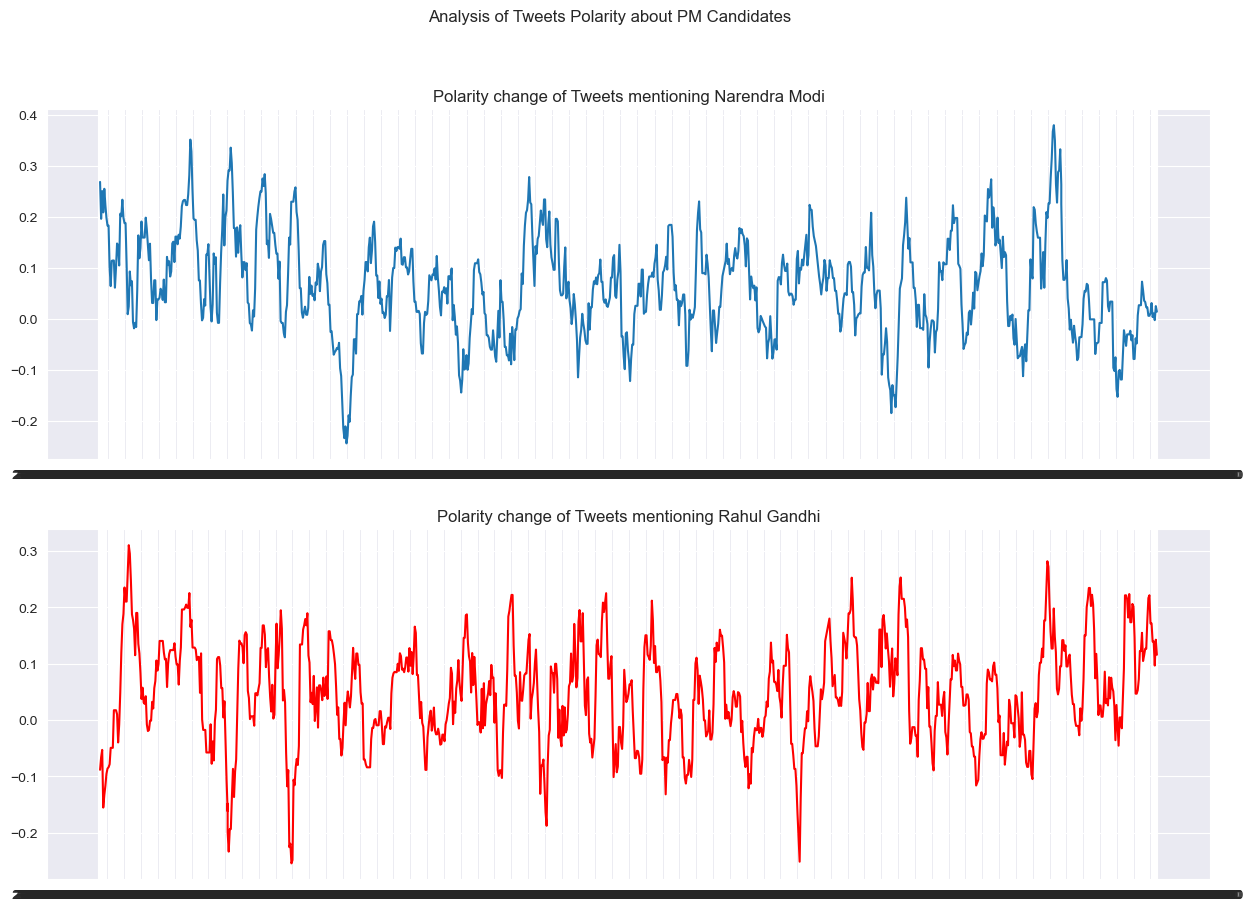

In [265]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(naModi['Date'][:1000], naModi['MA Polarity'][:1000])
axes[0].set_title("\n".join(["Polarity change of Tweets mentioning Narendra Modi"]))
axes[1].plot(raGandhi['Date'][:1000], raGandhi['MA Polarity'][:1000], color='red')
axes[1].set_title("\n".join(["Polarity change of Tweets mentioning Rahul Gandhi"]))
fig.suptitle("\n".join(["Analysis of Tweets Polarity about PM Candidates"]), y=0.98)
plt.show()